In this practical session, you will implement different strategies to build a recommender system.

# Dataset



We will be utilizing 'The Movie Dataset' hosted on Kaggle, featuring comprehensive metadata for 45,000 movies listed in the Full MovieLens Dataset (accessible here: [Full MovieLens Dataset](https://grouplens.org/datasets/movielens/)). The dataset encompasses films released up until July 2017 and includes a variety of data points such as cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, as well as TMDB vote counts and vote averages.

Additionally, this dataset encompasses 26 million ratings from 270,000 users across all 45,000 movies. These ratings, ranging from 1 to 5, are sourced directly from the official GroupLens website.

To access this dataset, a [Kaggle](https://www.kaggle.com/) account is required. After logging into Kaggle, navigate to your account settings and scroll to the API section to generate a new API token. This token will facilitate the direct download of the dataset via the Kaggle library in your notebook.

![Instructions for generating a Kaggle API token](https://drive.google.com/uc?export=view&id=1YcSTHD_FGrwDKaaLk6T9Gsdte8TKuPCt)

Now, you can proceed to install the Kaggle library in your notebook, which allows for the dataset to be downloaded directly.


In [1]:
!pip install kaggle

Run the next cell to upload your token.

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle (1).json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 68 bytes
mv: cannot stat 'kaggle.json': No such file or directory


We will begin by analyzing the metadata dataset, which includes comprehensive information about the movies.  
This dataset encompasses details such as movie titles, descriptions, genres, and even their average IMDb ratings.

In [3]:
!kaggle datasets download "rounakbanik/the-movies-dataset" -f movies_metadata.csv
!kaggle datasets download "rounakbanik/the-movies-dataset" -f ratings.csv
!unzip movies_metadata.csv.zip
!unzip ratings.csv.zip

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
 41% 5.00M/12.2M [00:00<00:00, 44.3MB/s]
100% 12.2M/12.2M [00:00<00:00, 87.7MB/s]
Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
 99% 168M/170M [00:01<00:00, 90.8MB/s]
100% 170M/170M [00:01<00:00, 91.2MB/s]
Archive:  movies_metadata.csv.zip
  inflating: movies_metadata.csv     
Archive:  ratings.csv.zip
  inflating: ratings.csv             


Use pandas to explore the `movies_metadata.csv` dataset.


In [4]:
import pandas as pd
metadata = pd.read_csv('movies_metadata.csv')
metadata.dropna(subset=['title'], inplace=True)
metadata['id'] = pd.to_numeric(metadata['id'])
metadata['genres'] = metadata['genres'].apply(lambda x: [i['name'] for i in eval(x)])
metadata = metadata[['id', 'title', 'genres', 'release_date', 'vote_average', 'vote_count']]
metadata.head(5)

<ipython-input-4-8e2a9fc35ff1>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('movies_metadata.csv')


,id,title,genres,release_date,vote_average,vote_count
0,862,Toy Story,"[Animation, Comedy, Family]",1995-10-30,7.7,5415.0
1,8844,Jumanji,"[Adventure, Fantasy, Family]",1995-12-15,6.9,2413.0
2,15602,Grumpier Old Men,"[Romance, Comedy]",1995-12-22,6.5,92.0
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]",1995-12-22,6.1,34.0
4,11862,Father of the Bride Part II,[Comedy],1995-02-10,5.7,173.0


Using the release date, create a new column called `year` and use seaborn to plot the number of movies per year.

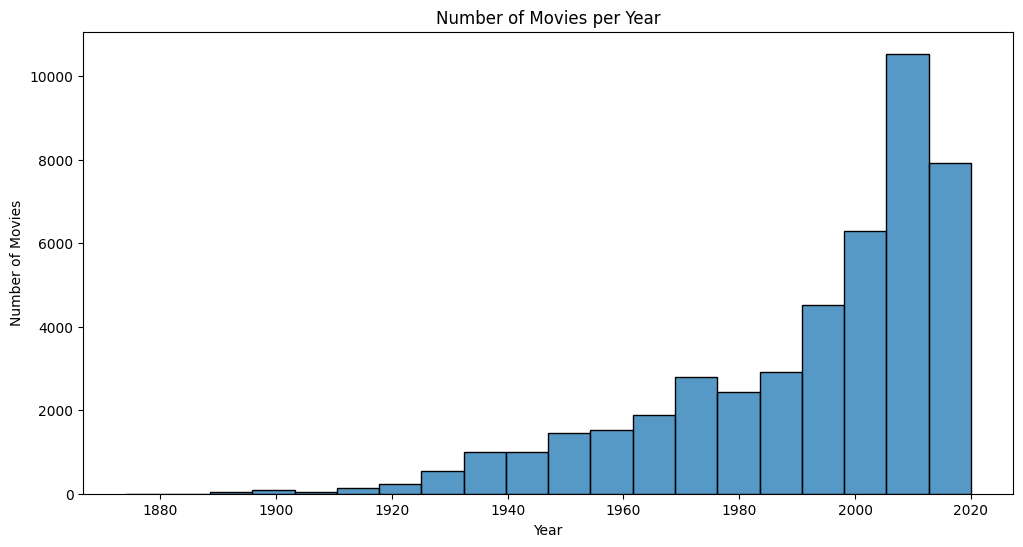

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

metadata['year'] = metadata['release_date'] = pd.to_datetime(metadata['release_date']).dt.year
plt.figure(figsize=(12, 6))
sns.histplot(data=metadata, x='year', bins=20)
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Recommendation by popularity

Let's start with a straightforward approach to generating recommendations by suggesting the top 5 movies based on their average score. However, it's worth noting that while average score is a useful metric, it may not always provide the most personalized recommendations, as individual preferences can vary widely.

In [8]:
top_5_movies = metadata[['title','vote_average']].sort_values(by='vote_average', ascending=False).head(5)
print(top_5_movies)

                                                 title  vote_average
21642  Ice Age Columbus: Who Were the First Americans?          10.0
15710        If God Is Willing and da Creek Don't Rise          10.0
22396                                   Meat the Truth          10.0
22395            Marvin Hamlisch: What He Did For Love          10.0
35343                       Elaine Stritch: At Liberty          10.0


Have you seen any of these movies?  
You may have guessed that the average score is only reliable when it is averaged on a sufficient number of votes.
Use seaborn ```histplot``` method to plot the histogram of the number of votes.
For better readability you may first do this plot for the movies with less than 100 votes and then do another one for the remaining ones.

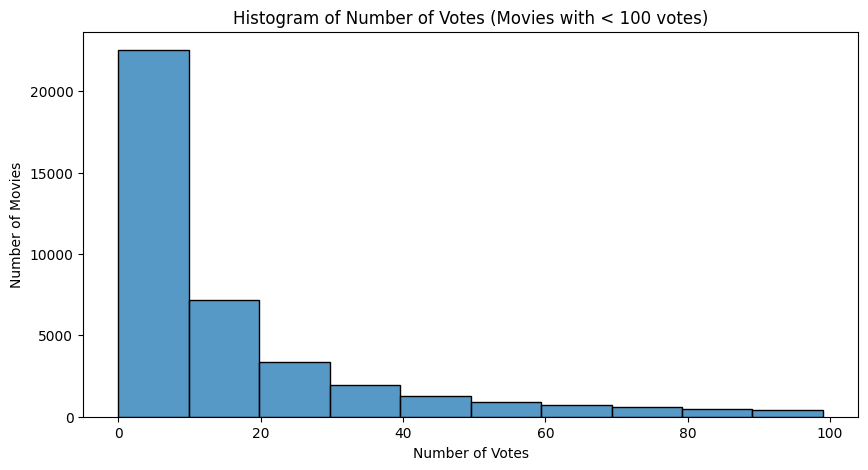

In [15]:
# Plot histogram for movies with less than 100 votes
plt.figure(figsize=(10, 5))
sns.histplot(data=metadata[metadata['vote_count'] < 100], x='vote_count', bins=10)
plt.title('Histogram of Number of Votes (Movies with < 100 votes)')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies')
plt.show()

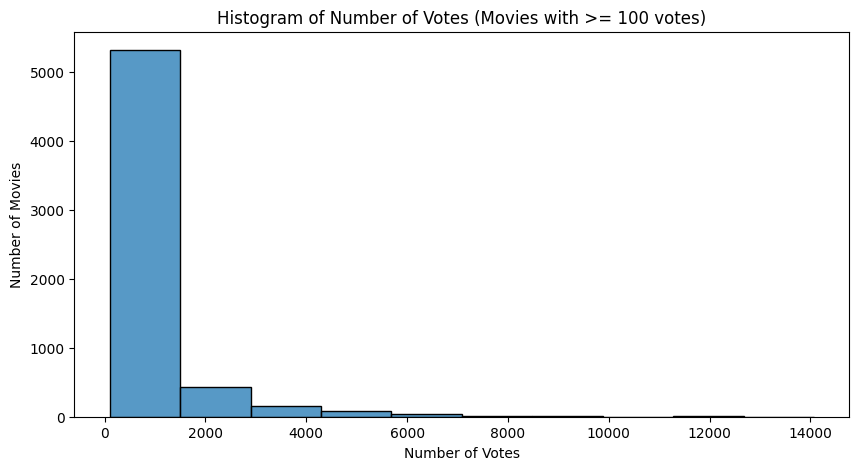

In [16]:
# Plot histogram for movies with more than 100 votes
plt.figure(figsize=(10, 5))
sns.histplot(data=metadata[metadata['vote_count'] >= 100], x='vote_count', bins=10)
plt.title('Histogram of Number of Votes (Movies with >= 100 votes)')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies')
plt.show()

Try to visualize the best movies according to the average vote for movies that have at least 1000 votes.  
You should now know some of these movies now.


In [ ]:
...

## Best movies by IMDb score
IMDb (an acronym for Internet Movie Database) is an online database of information related to films, television programs, home videos, video games, and streaming content online.
It might be considered as one of the most exhaustive databases on movies.
In addition, IMDb maintains a ranking of movies according to people's votes. To do so, it computes a score based on the average rating and the number of votes.
The formula they are using is described [here](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#)
![](https://drive.google.com/uc?export=view&id=12J_uJ86eOimr8Y0LHTGSMmUgkBnZu9cO)  
Use this formula to compute the IMDb score for all movies and visualize the ones with the best scores. (You may use a smaller value for m, 500 for example)


In [ ]:
m = 500
c = metadata.vote_average.mean()

def imdb_score(x):
    ...

metadata['imdb_score'] = metadata.apply(imdb_score, axis=1)
...

What were the best movies in your birth year?

In [ ]:
...

One way to refine recommendations is by considering popularity and recommending products from the same category or genre. This approach can help ensure that the suggestions are not only highly rated but also aligned with the user's interests.  
The following code will create a data frame containing one-hot encoding of the movie's genre.
Use it to recommend the best movies according to the genre and the IMDB score (for example the best Horror movies)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_df = pd.DataFrame(mlb.fit_transform(metadata['genres'].fillna('[]')),columns=mlb.classes_, index=metadata.index)
metadata = pd.concat([metadata.drop(columns=['genres']), genre_df], axis=1)
metadata.head()

Recommend some horror or comedy movies.

In [ ]:
...

# Content based recommender systems


### Item description
An alternative approach to building a recommender system is to generate recommendations based on content characteristics. This method is particularly appealing when dealing with situations where there are limited user interactions or a scarcity of new items to recommend. It's highly probable that your catalog includes supplementary data related to the items. This additional information is typically curated manually and can contain valuable features for the development of a content-based recommender system.

In our specific case, we will obtain a dataset that includes keywords associated with the movies to facilitate this approach.

In [ ]:
!kaggle datasets download "rounakbanik/the-movies-dataset" -f keywords.csv
!unzip keywords.csv.zip

In [ ]:
keywords = pd.read_csv('keywords.csv')
keywords['keywords'] = keywords['keywords'].apply(lambda x: " ".join([i['name'] for i in eval(x)])).fillna('')
keywords.head()

These keywords can serve as excellent descriptors for our movies.  
To enable similarity calculations between movies, it's essential to represent them in a vectorized format.  
We will now create another dataframe containing all the movies attributes.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

mlb = CountVectorizer(max_features=400)
keywords_transformed = mlb.fit_transform(keywords['keywords'])
keywords_transformed = pd.DataFrame(keywords_transformed.toarray(), columns=mlb.get_feature_names_out(), index=keywords.index)
keywords = pd.concat([keywords.drop(columns=['keywords']), keywords_transformed], axis=1)
keywords.head()

We will proceed by constructing a dataframe in which each movie is depicted through its attribute vectors, encompassing keywords and genres.  
To optimize computational resources and reduce memory requirements, we will restrict our analysis to movies released after the year 2010.

In [ ]:
subset = metadata[metadata['release_date'] > "2010"].reset_index(drop=True)

attributes_df = pd.merge(subset.drop(columns=['release_date', 'vote_average', 'vote_count', 'year',
       'imdb_score']), keywords, on='id')
attributes_df.head()

Now that you have a representation computed for each movie, you can calculate distances or similarities for movie pairs.  
Use scikit-learn 's [cosine_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_distances.html) function, to compute the cosine similarity matrix of your dataframe.  

In [ ]:
from sklearn.metrics.pairwise import cosine_distances
cosine_sim = ...

Use the following function with your similarity matrix to recommend movies from another movie title.  
Try on several movies.

In [ ]:
titles = attributes_df['title']
indices = pd.Series(attributes_df.index, index=attributes_df['title'])

def get_reco(title, sim_matrix):
  idx = indices[title]
  print(f'original: {title}')
  recos = sim_matrix[idx].argsort()[1:6]
  recos = titles.iloc[recos]

  print(recos)

In [ ]:
title = 'LEGO: The Adventures of Clutch Powers'
get_reco(title, cosine_sim)

In [ ]:
title = 'Iron Man 2'
get_reco(title, cosine_sim)

In [ ]:
title = 'How to Train Your Dragon'
get_reco(title, cosine_sim)

In [ ]:
title = 'Alice in Wonderland'
get_reco(title, cosine_sim)

Let's free some memory in the Colab instance.

In [ ]:
del(cosine_distances)
del(attributes_df)

### Images

Images are another type of content associated to products.  
It may not necessarily be relevant in the case of movies but let's do it anyway.  
We will now recommend movies according to their posters.  
First, we need to download another dataset.

In [ ]:
!kaggle datasets download "ghrzarea/movielens-20m-posters-for-machine-learning"
!unzip movielens-20m-posters-for-machine-learning.zip

The following code will help loading the data with Pytorch.

In [ ]:
import torch
from torchvision import datasets

class ImageAndPathsDataset(datasets.ImageFolder):
    def __getitem__(self, index):
        img, _= super(ImageAndPathsDataset, self).__getitem__(index)
        path = self.imgs[index][0]
        return img, path



We will use a pre-trained network to extract the features from the posters.
Similar to what we did with the item descriptions, we will compute similarities between the movies according to these features.

The pre-trained model was trained with normalized images. Thus, we have to normalize our posters before feeding them to the network.
The following code instantiates a data loader with normalized images and provides a function to revert the normalization for visualization purposes.


In [ ]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

mean = [ 0.485, 0.456, 0.406 ]
std = [ 0.229, 0.224, 0.225 ]
normalize = transforms.Normalize(mean, std)
inv_normalize = transforms.Normalize(
   mean= [-m/s for m, s in zip(mean, std)],
   std= [1/s for s in std]
)

transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                normalize])
dataset = ImageAndPathsDataset('MLP-20M', transform)

dataloader = DataLoader(dataset, batch_size=128, num_workers=2, shuffle=False)

Here are some exemples of posters:

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
x, paths = next(iter(dataloader))
img_grid = make_grid(x[:16])
img_grid = inv_normalize(img_grid)
plt.figure(figsize=(20,15))
plt.imshow(img_grid.permute(1, 2, 0))
plt.axis('off')

Instantiate a pre-trained a mobilenet_v3_small model (documentation [here](https://pytorch.org/vision/stable/models.html))

In [ ]:
import torchvision.models as models
mobilenet = ...

Have a look to the model:

In [ ]:
mobilenet

We will now crate a subset of this model to extract the features.
Use a Sequential model to get only the features followed by the avgpool layer of mobilnet and finish with a Flatten layer (```torch.nn.Flatten()```)


In [ ]:
model = ... .cuda()

If your model is OK, it should predict 576-dimensional vectors.

In [ ]:
import torch
x = torch.zeros(100, 3, 224,224).cuda()
y = model(x)
y.shape


We will proceed to establish a dataframe containing our extracted features, along with the file paths to the poster images..

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

features_list = []
paths_list = []

for x, paths in tqdm(dataloader):
    with torch.no_grad():
        embeddings = model(x.cuda())
        features_list.extend(embeddings.cpu().numpy())
        paths_list.extend(paths)

df = pd.DataFrame({
    'features': features_list,
    'path': paths_list
})

df.head()

We will now extract all the features into a numpy array that will be used to compute the similarity matrix.

In [ ]:
import numpy as np
features = np.vstack(features_list)
features.shape

Now compute the cosine similarities between the embeddings of your movies.

In [ ]:
from sklearn.metrics.pairwise import cosine_distances
cosine_sim = ...

The ```plot_image``` function  displays a poster according to it's path.  
Fill the ```plot_images``` function to plot a series of posters from a list of paths.

In [ ]:
import matplotlib.image as mpimg

def plot_image(path):
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.axis('off')

def plot_images(paths_list):
  ...


plot_images(['MLP-20M/MLP-20M/1.jpg', 'MLP-20M/MLP-20M/2.jpg', 'MLP-20M/MLP-20M/3.jpg', 'MLP-20M/MLP-20M/4.jpg', 'MLP-20M/MLP-20M/5.jpg'])

Fill the following code to implement a function that plots the top 5 recommendations for a movie according to its index.

In [ ]:
def plot_reco(idx, sim_matrix):
  img = plot_image(df['path'][idx])
  recos = ...
  reco_posters = ...
  plot_images(reco_posters)

idx = 16 #10 #200
plot_reco(idx, cosine_sim)

Try with different movie indexes, you will be surprised by the lack of originality of the poster designers!  
Look at [this post](https://thechive.com/2020/01/20/all-movie-posters-look-the-same-what-the-hell-is-this-sht-20-photos/) to convince yourself.

## Vector databases  

Computing the similarity matrix is a very expensive operation in terms of memory and computation time that scales quadratically with the number of items.  It is also not very practical to store this matrix in a database.  
Vector databases offer a suite of advantages tailored to the needs of modern data analytics and machine learning applications. At their core, they specialize in handling high-dimensional data, allowing for efficient similarity searches—something traditional databases struggle with. This makes them invaluable for tasks like recommendation systems, image searches, and semantic text retrieval. Beyond search efficiency, vector databases are designed for scalability, capable of handling billions of vectors without a hitch. Furthermore, they often come with built-in mechanisms for distributed storage and computation, ensuring data resilience and fast query speeds even as data volumes grow. In essence, vector databases are the backbone that empowers many of the AI-driven solutions we see today.  
For our current session, we're aiming for simplicity and efficiency. Many of the standard vector databases, like [Milvus](https://milvus.io/) or [Weaviate](https://weaviate.io/), require their own dedicated installations and often need to run on separate servers or containers.  
This can introduce added complexity. Instead, we're turning to [Annoy](https://github.com/spotify/annoy) a straightforward library developped by Spotify that lets us perform efficient neighbor searches without the installation and server overhead. While Annoy is great for our present needs, do keep in mind that in larger, production scenarios, the capabilities of a dedicated vector database could be invaluable.

In [ ]:
!pip install annoy

We will thus use the annoy library to create a vector database with our features.  
In our case the database will be a simple file on the disk that we will load in memory when needed.
To create the database, we will use an AnnoyIndex with the same dimensionality as our features and a metric to compute the distance between vectors.  
Here we will use the cosine distance and set the database vector size to 576 (the size of our features).

In [ ]:
from annoy import AnnoyIndex

dim = 576
annoy_index = AnnoyIndex(dim, 'angular')

We will now fill the database with our features as indexed vectors.

In [ ]:
for i, embedding in enumerate(features_list):
    annoy_index.add_item(i, embedding)

annoy_index.build(10)

The `annoy_index.build(10)` command builds the underlying data structures required for Annoy to perform its approximate nearest neighbor searches. Specifically, the number 10 indicates that Annoy should construct 10 trees. Building multiple trees helps improve the accuracy of the search at the expense of using more memory. In essence, this command is preparing Annoy to efficiently handle future queries.

Vector databases excel at efficient similarity searches due to their foundational design principles. Traditional databases rely on exact matches or predefined indices to retrieve data. In contrast, vector databases operate in the realm of high-dimensional vector spaces. Here, data points (or vectors) that are semantically or contextually similar are often closer in distance. By leveraging algorithms optimized for these spaces, like approximate nearest neighbor (ANN) searches, vector databases quickly identify data points that lie near a query point. This spatial awareness enables them to bypass exhaustive scans and zero in on relevant results, making similarity searches both rapid and precise.
Thus querying the database for the most similar items to a given item is a very fast operation.  
Complete the following function to retrieve the most similar items to a given item.

In [ ]:
def search(query_vector, k=5):
    indices = annoy_index.get_nns_by_vector(query_vector, k)
    paths = ...
    return paths

Use this function to plot the top-k recommendations for a movie.

In [ ]:
index = 600
plot_image(df.path[index])
query_vector = df.features[index]
result = search(query_vector)
plot_images(result)

Save you database, you will need it for your project.

In [ ]:
annoy_index.save('rec_imdb.ann')

# Collaborative filtering

### Item-Item

Item-item collaborative filtering, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings.
For sake of simplicity, in this practical session, we will only focus on item-item similarity methods.
If you have time, feel free to try an user-item approach. The following [blog post](https://notebook.community/saksham/recommender-systems/Collaborative%20Filtering) may help you to do it.

We will use another dataset containing the ratings of several users on movies.

In [ ]:
!wget https://raw.githubusercontent.com/wikistat/AI-Frameworks/master/RecomendationSystem/movielens_small/movies.csv
!wget https://raw.githubusercontent.com/wikistat/AI-Frameworks/master/RecomendationSystem/movielens_small/ratings.csv

In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings = ratings.rename(columns={'movieId':'id'})
ratings['id'] = pd.to_numeric(ratings['id'])
ratings = pd.merge(ratings, metadata[['title', 'id']], on='id')[['userId', 'id', 'rating', 'title']]
ratings.head()

In [ ]:
ratings.shape

This dataset is a bit huge and may slow down futur computations. Moreover collaborative filtering kind of suffers from products or user with few ratings.
We will only focus on the 100 movies with the most ratings and the users with the highest number of ratings.

In [ ]:
# filter movies
ratings['count'] = ratings.groupby('id').transform('count')['userId']
movieId = ratings.drop_duplicates('id').sort_values(
    'count', ascending=False).iloc[:200]['id']
ratings = ratings[ratings['id'].isin(movieId)].reset_index(drop=True)

#filter users
ratings['count'] = ratings.groupby('userId').transform('count')['id']
userId = ratings.drop_duplicates('userId').sort_values(
    'count', ascending=False).iloc[:20001]['userId']
ratings = ratings[ratings['userId'].isin(userId)].reset_index(drop=True)

ratings.shape

In [ ]:
ratings.head()

In [ ]:
ratings.title.unique()[:100]

Now, we need to build a pivot table with user in lines, movies in columns and ratings as values.  
Use pandas [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) method to create this pivot table.

In [ ]:
pivot = ...
pivot.head(100)

With this pivot table, it is now easy to compute the similarity between movies.
Indeed each movie can be represented by a vector of the users' ratings.
Instead of using a cosine similarity distance as we did earlier in the notebook, we will use the Pearson correlation score since it is already implemented in Pandas.
The pivot table has a method [```corrwith```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html) that will return the Pairwise correlation score of one entry with all entries of the table.

In [ ]:
movie_vector = pivot["Titanic"]
similarity = pivot.corrwith(movie_vector)
...

Sort the produced results to get the best recommendations to "Titanic".
You may also try with different movies.

## Matrix factorization
Matrix factorization is certainly one of the most efficient way to build a recomender system. I really encourage you to have a look to [this article](https://datajobs.com/data-science-repo/Recommender-Systems-%5BNetflix%5D.pdf) presenting the matrix factorization techniques used in recommender systems.

The idea is pretty simple, it consists in factorizing the ratings matrix $R$ into the product of a user embedding matrix $U$ and an item embedding matrix $V$, such that $R \approx UV^\top$ with
$U = \begin{bmatrix} u_{1} \\ \hline \vdots \\ \hline u_{N} \end{bmatrix}$ and
$V = \begin{bmatrix} v_{1} \\ \hline \vdots \\ \hline v_{M} \end{bmatrix}$.

Where
- $N$ is the number of users,
- $M$ is the number of items,
- $R_{ij}$ is the rating of the $j$th item by the $i$th user,
- each row $U_i$ is a $d$-dimensional vector (embedding) representing user $i$,
- each row $V_j$ is a $d$-dimensional vector (embedding) representing item $j$,


One these emmbeding matrices are built, predicting the rating of an user $i$ for an item $j$ consists in computing the dot product $\langle U_i, V_j \rangle$.

### Using surpise

![](https://drive.google.com/uc?export=view&id=1dh2RJ95F0j-rZyuf59G35239B42veAWD)

We will begin by using the famous Singular Value Decomposition method.
Several libraries implement this algorithm.
In this session, we will be using [Surprise](http://surpriselib.com/).
Surprise is a recommender system library implemented in Python.
It was actually developed by [Nicolas Hug](http://nicolas-hug.com/about) an INSA Toulouse Alumni!

In [ ]:
!pip install scikit-surprise

Surprise implements the SVD algorithm.  Help yourself with [the doc](https://surprise.readthedocs.io/en/stable/getting_started.html) to train an SVD model on the rating dataset.

In [ ]:
#Creating a train and a test set
testset = ratings.sample(frac=0.1, replace=False)
trainset = ratings[~ratings.index.isin(testset.index)]

assert set(testset.userId.unique()).issubset(trainset.userId.unique())
assert set(testset.id.unique()).issubset(trainset.id.unique())

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader = ...
data = Dataset.load_from_df(ratings[['userId', 'id', 'rating']].fillna(0), reader)
svd = ...

# Run 5-fold cross-validation and print results.
...

In [ ]:
#full dataset training
svd = SVD()
s_trainset = data.build_full_trainset()
svd.fit(s_trainset)

Let us look some ratings for one user in the test dataset.

In [ ]:
testset[testset['userId'] == 24]

What would your model predict for these exemples?

In [ ]:
uid = 24
iid = ...

svd.predict(uid, iid)

Write a code to recommend 5 movies to an user.

### Using gradient descent
Another way to compute the matrix factorization consists in using gradient descent to minimize $\text{MSE}(R, UV^\top)$ where:

$$
\begin{align*}
\text{MSE}(A, UV^\top)
&= \frac{1}{|\Omega|}\sum_{(i, j) \in\Omega}{( R_{ij} - (UV^\top)_{ij})^2} \\
&= \frac{1}{|\Omega|}\sum_{(i, j) \in\Omega}{( R_{ij} - \langle U_i, V_j\rangle)^2}
\end{align*}
$$
where $\Omega$ is the set of observed ratings, and $|\Omega|$ is the cardinality of $\Omega$.

We will now implement our own matrix factorization algorith using Pytorch.  
To do so we first need to convert our ratings datasets in Pytorch datasets.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

user_list = trainset.userId.unique()
item_list = trainset.id.unique()
user2id = {w: i for i, w in enumerate(user_list)}
item2id = {w: i for i, w in enumerate(item_list)}

class Ratings_Datset(Dataset):
    def __init__(self, df):
        self.df = df.reset_index()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        user = user2id[self.df['userId'][idx]]
        user = torch.tensor(user, dtype=torch.long)
        item = item2id[self.df['id'][idx]]
        item = torch.tensor(item, dtype=torch.long)
        rating = torch.tensor(self.df['rating'][idx], dtype=torch.float)
        return user, item, rating


trainloader = DataLoader(Ratings_Datset(trainset), batch_size=512, shuffle=True ,num_workers=2)
testloader = DataLoader(Ratings_Datset(testset), batch_size=64, num_workers=2)

These dataloader will provide mini-batches of tuples <user, movie, rating>.
We will use a special type of Pytorch layers call [Embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html).
These layers will create a mapping between an index and a vector representation.
In our case they will provide vector representations of our users and items.
We will train the matrix factorization model to minimize the prediction error between a rating and the dot product of an user embedding with a movie embedding.
![](https://drive.google.com/uc?export=view&id=1wSQbcSN_I28mF74-wnb8_qjAzRH9YDjA)

Complete the following code to implement the ```MatrixFactorization``` class in Pytorch.

In [ ]:
import torch

class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()
        self.user_embeddings = ...
        self.item_embeddings = ...

    def forward(self, user, item):
        return torch.mul(self.user_embeddings(user), self.item_embeddings(item)).sum(1)
        #return (self.user_embeddings(user)*self.item_embeddings(item)).sum(1)

Complete the training method that we will use to train the network.

In [ ]:
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
from statistics import mean


def train(model, optimizer, trainloader, epochs=30):
    criterion = nn.MSELoss(reduction='mean')
    t = tqdm(range(epochs))
    for epoch in t:
        total = 0
        train_loss = []
        for users, items, r in trainloader:
            users = users.cuda()
            items = items.cuda()
            r = r.cuda() / 5
            r = r.unsqueeze(1)
            y_hat = ...
            loss = ...
            train_loss.append(loss.item())
            total += r.size(0)
            ...
            ...
            ...
            t.set_description(f"loss: {mean(train_loss)}")

We now have everything to train our model.
Train your model for 5 to 10 epochs.

In [ ]:
n_user = trainset.userId.nunique()
n_items = trainset.id.nunique()
model = MatrixFactorization(n_user, n_items).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train(model, optimizer, trainloader, epochs=5)

Complete the following code to evaluate your model.

In [ ]:
import math

def test(model, testloader):


    running_mae = 0
    with torch.no_grad():
        total = 0
        for users, items, r in testloader:
            users = users.cuda()
            items = items.cuda()
            y = r.cuda() / 5
            y_hat = ...
            error = ...

            running_mae += error
            total += y.size(0)

    mae = running_mae/total
    return mae * 5


test(model, testloader)

Try to compare the predictions of your model with actual ratings.

In [ ]:
users, movies, r = next(iter(testloader))
users = users.cuda()
movies = movies.cuda()
r = r.cuda()

y = model(users, movies)*5
print("ratings", r[:10].data)
print("predictions:", y.flatten()[:10].data)

We just trained a matrix factorization algorithm using Pytorch.
In this setting, the final prediction was made with the dot product of our embeddings.
Actually with a minimal modification of the Class, we could create a full neural network.
If we replace the dot product with a fully-connected network, we would actually have an end-to-end neural network able to predict the ratings of our users.
![](https://drive.google.com/uc?export=view&id=1THBMB-Z3db0Rn0dyYYWhN98AHcYEM-nT)  
This approach is called Neural Collaborative Filtering and is presented in this [paper](https://arxiv.org/pdf/1708.05031.pdf).
Try to fill in the following code to create an NCF network.



In [ ]:
class NCF(nn.Module):

    def __init__(self, n_users, n_items, n_factors=8):
        super().__init__()
        self.user_embeddings = torch.nn.Embedding(n_users, n_factors)
        self.item_embeddings = torch.nn.Embedding(n_items, n_factors)
        self.predictor = torch.nn.Sequential(
            ...
            nn.Sigmoid()
        )


    def forward(self, user, item):


        u = self.user_embeddings(user)
        i = self.item_embeddings(item)

        # Concat the two embedding layers
        z = torch.cat([u, i], dim=-1)
        return ...

Train your NCF network on the train dataset and test it on the test dataset.

In [ ]:
model = NCF(n_user, n_items).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train(model, optimizer, trainloader, epochs=5)

In [ ]:
test(model, testloader)

In [ ]:
users, movies, r = next(iter(testloader))
users = users.cuda()
movies = movies.cuda()
r = r.cuda()

y = model(users, movies)*5
print("ratings", r[:10].data)
print("predictions:", y.flatten()[:10].data)

### Implicit feedback with pytorch

In this practical session, we only worked with explicit feedbacks (ratings).
Sometimes you do not have access to such quantitative feedback and have to deal with implicit feedback.
An implicit feedback is a user's qualitative interaction with an item, such as clicking on an item (positive feedback) or stopping watching a video (negative feedback).
If you are interested in neural collaborative filtering in the case of implicit feedback, I recommend you look at this [excellent tutorial](https://sparsh-ai.github.io/rec-tutorials/matrixfactorization%20movielens%20pytorch%20scratch/2021/04/21/rec-algo-ncf-pytorch-pyy0715.html).